In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [2]:
df = pd.read_csv("sim_data_full.csv")
df["drug_duration"] = "short"
df["drug_duration"].loc[df["drug_type"]=="DP"] = "long"

df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
# df_pfpr = df[df["baseline_transmission_metric"]=="eir"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

df_eir = df[df["baseline_transmission_metric"]=="eir"].reset_index(drop=True)

c:\users\joshsu\venv\dev\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [15]:
scenarios_to_plot = [1,7,
                     4,10,
                     13,19,
                     16,22]
df_plot = df_pfpr[np.in1d(df_pfpr["scenario_number"], scenarios_to_plot)].reset_index(drop=True)

In [16]:
set(df_plot["scenario_number"])

{1, 4, 7, 10, 13, 16, 19, 22}

meta NOT subset; don't know how to subset; dropped


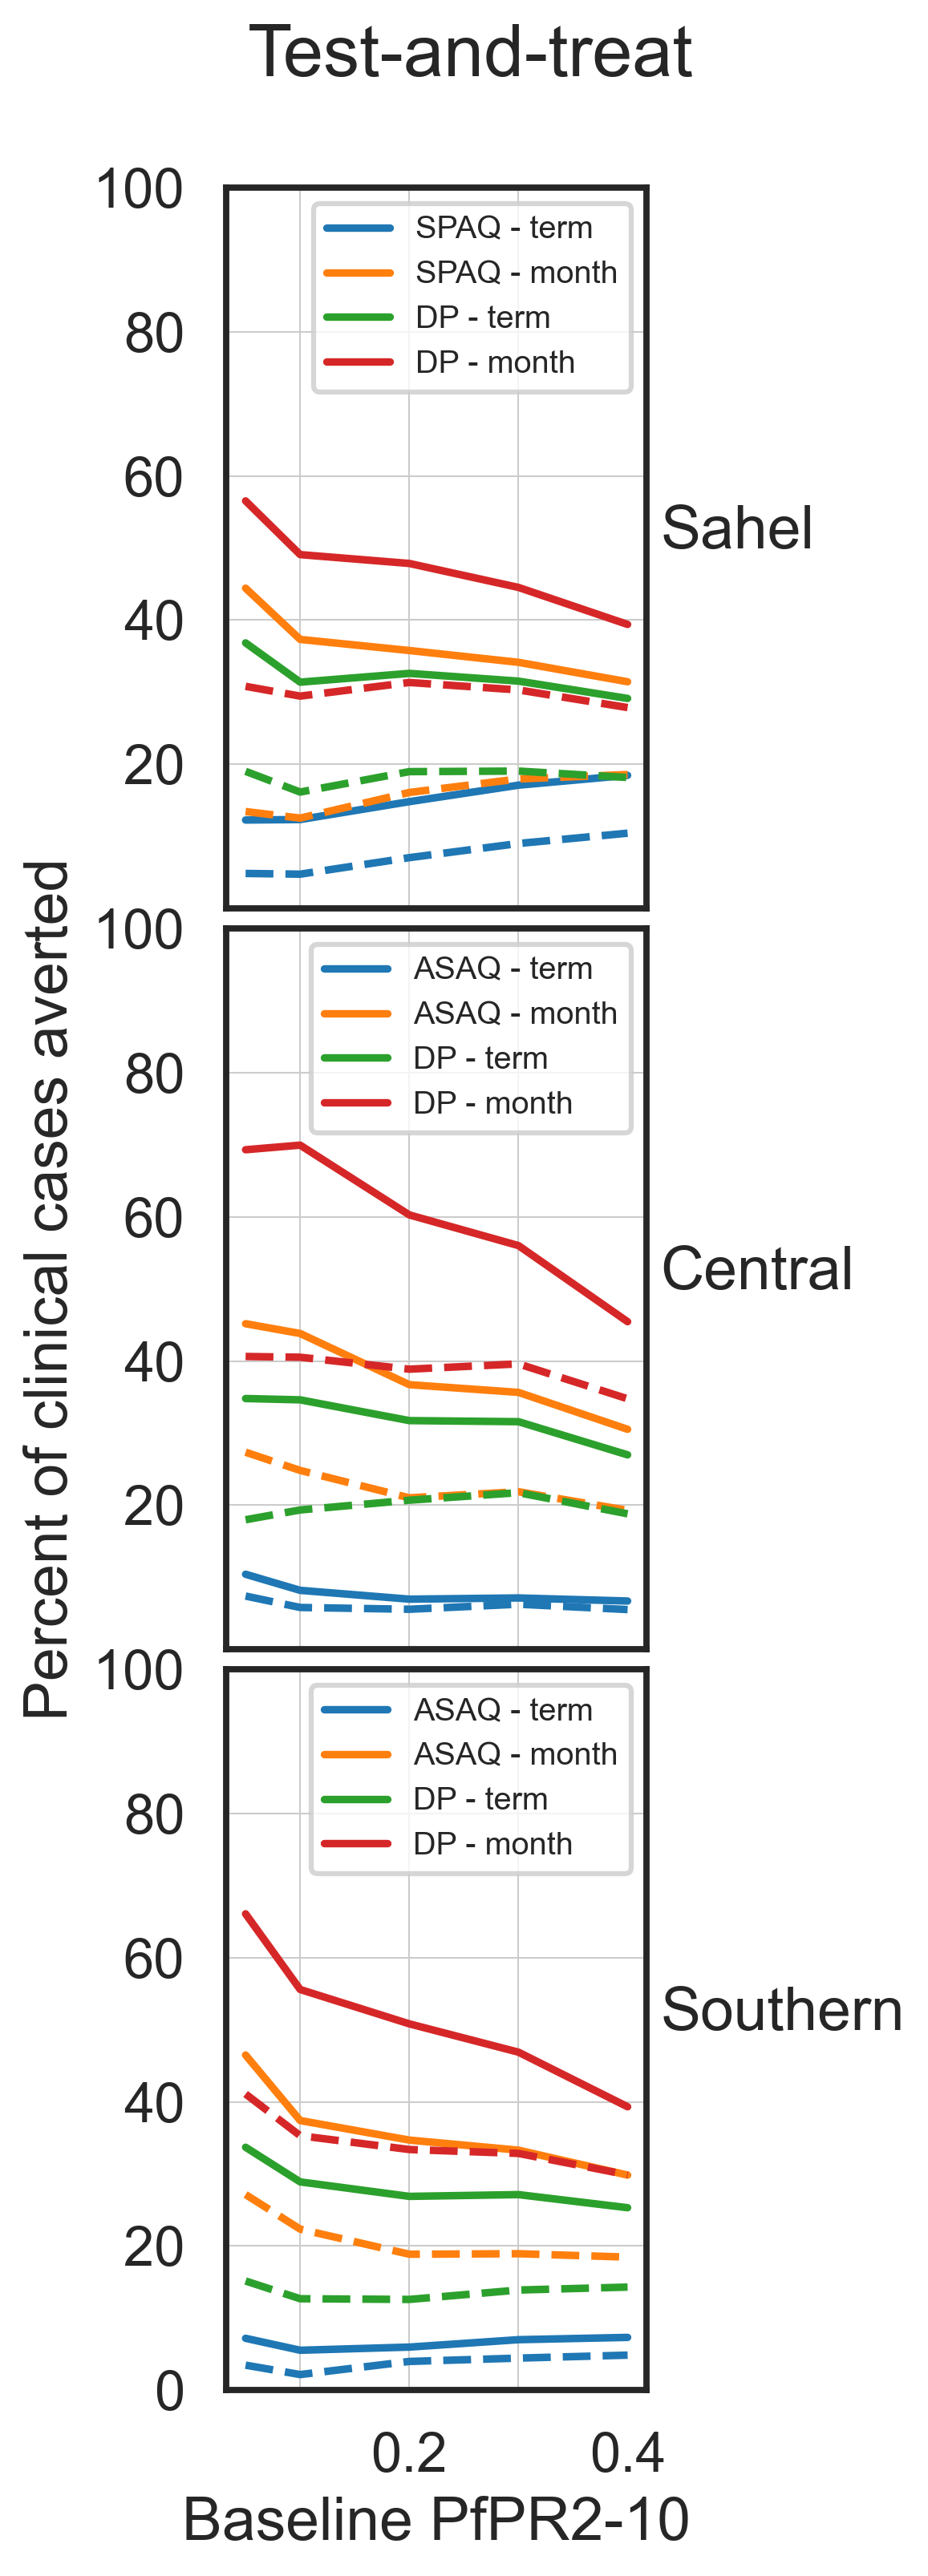

In [32]:

df_singleplot = df_plot.copy()
drug_types = ["ASAQ", "SPAQ", "DP"]
df_singleplot["drug_type"] = pd.Categorical(df_singleplot["drug_type"], drug_types, ordered=True)

archetypes = ["Sahel", "Central", "Southern"]
df_singleplot["archetype"] = pd.Categorical(df_singleplot["archetype"], categories = archetypes, ordered=True)

plt.figure(dpi=300, figsize=(8.5/2,11))


# ==================================================================================
# Sahel:
sdf = df_singleplot[df_singleplot["archetype"]=="Sahel"]
sahel_label_dict = {1: "SPAQ - term",
             4: "SPAQ - month",
             13: "DP - term",
             16: "DP - month"}
    
southcent_label_dict = {1: "ASAQ - term",
             4: "ASAQ - month",
             13: "DP - term",
             16: "DP - month"}
    
color_dict = {
    1: "C0", 
    4: "C1",
    13: "C2", 
    16: "C3",
    7: "C0",
    10: "C1",
    19: "C2",
    22: "C3"
}



i=1
for a, sdf in df_singleplot.groupby("archetype"):
    plt.subplot(3,1,i)
    for s, ssdf in sdf.groupby("scenario_number"):
        if s in label_dict:
            if a == "Sahel":
                label = sahel_label_dict[s]
            else:
                label = southcent_label_dict[s]
            ls = "solid"
        else:
            label = None
            ls = "dashed"
        plt.plot(ssdf["transmission_level"], 100*ssdf["frac_averted_clinical__all"], 
                 c=color_dict[s], label=label, ls = ls)
    plt.legend(fontsize=9.5)

    plt.ylim([0,100])
    
    if i != 3:
        plt.xticks([])
        
    if i == 3:
        plt.yticks([0,20,40,60,80,100])
    else:
        plt.yticks([20,40,60,80,100])
        
    if i == 2:
        plt.ylabel("Percent of clinical cases averted")
    if i == 3:
        plt.xlabel("Baseline PfPR2-10")
    
    plt.text(0.43,50,a)
        
    
    plt.axhline(80, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(60, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(40, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axhline(20, c="#CCCCCB", zorder=0, lw=0.5)

    plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
    plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)
    
    if i == 1:
        plt.suptitle("Test-and-treat")
    
    
    
    i+=1
    
plt.tight_layout(w_pad=0.1,h_pad=0)
plt.savefig("ist.pdf")
plt.savefig("ist.png")